<a href="https://colab.research.google.com/github/Riaven/Colab/blob/master/Analizando_datos_Cine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notas del profe
**Bien, es importante saber a qué tipo de datos me enfrentaré 
Deje notas, <br> en el código, pero dejare al final la limpieza de datos que puede hacer**<br>

#Accediendo a información Cine

###Hace años, un cine dejo de funcionar, pero antes de morir en su gloria dejo su archivo de **csv** para poder ser analizado, de este **dataset** se deberá de extraer información relevante como la que se muestra a continuación.

Se debe de obtener : 

- El director con más películas
- El director más criticado
- Un TOP 10 de las películas más largas
- El género con mayor relevancia
- Otra información a parecer


Configurando pandas

In [0]:
%pylab inline 
#Evita que los gráficos se abran en otras ventanas
import pandas as pd
import seaborn as sns
import numpy as np
#Cambiando presición
pd.set_option('precision', 5)

Populating the interactive namespace from numpy and matplotlib


Abriendo archivo **csv**

In [0]:
""" Modifico la ruta, para usar el archivo que cargue yo"""
dt = pd.read_csv('movie_metadata.csv', sep = ',')
#for col in dt.columns:
  # print("- **{}** {}".format(dt[col].dtype,col)) para saber las el tipo y nombre de cada columna
""" Bien, es importante saber a qué tipo de datos me enfrentaré """
dt.head(5) #imprime los 5 primeros registros del csv
""" Tambien para sabe a lo que nos enfrentamos, podemos usar info"""
dt.info() # imprimira la columnas, cantidad de registros validos, tipo de dato


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

# Dentro del archivo **CSV** se tienen las columnas:

   TIPO / NOMBRE
- **object** color
- **object** director_name
- **float64** num_critic_for_reviews
- **float64** duration
- **float64** director_facebook_likes
- **float64** actor_3_facebook_likes
- **object** actor_2_name
- **float64** actor_1_facebook_likes
- **float64** gross
- **object** genres
- **object** actor_1_name
- **object** movie_title
- **int64** num_voted_users
- **int64** cast_total_facebook_likes
- **object** actor_3_name
- **float64** facenumber_in_poster
- **object** plot_keywords
- **object** movie_imdb_link
- **float64** num_user_for_reviews
- **object** language
- **object** country
- **object** content_rating
- **float64** budget
- **float64** title_year
- **float64** actor_2_facebook_likes
- **float64** imdb_score
- **float64** aspect_ratio
- **int64** movie_facebook_likes

#Agrupando datos 

##Director con más películas


Se toma la columna director_name, al aplicar ```describe()``` se muestran los datos más relevantes, como el top que muestra al director **Steven Spielberg** como el director que más se repite, con una cantidad total de *26 veces*, para corroborar que esto sea real, se procede a encontrar a los primeros 5 directores que más se repitan dentro del registro

El director con más películas es Steven Spielberg    26
Name: director_name, dtype: int64


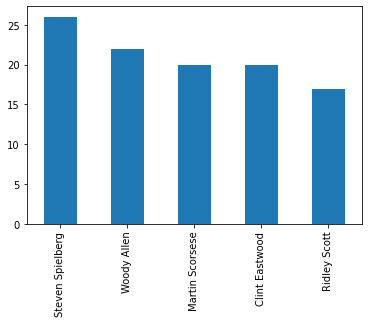

In [0]:
#Viendo los directores
dt['director_name'].describe()
####Info de directores (.describe())
#count                 4939
#unique                2398
#top       Steven Spielberg #director que más se repite
#freq                    26
#Name: director_name, dtype: object

#Peliculas por director
# Se toma la columna director_name, se cuentan los valores que se repiten y muestran los primeros 3
# y se crea un gráfico que muestre la diferencia entre los 5 primeros de manera visible
dt["director_name"].value_counts().head(5).plot(kind = 'bar')
#Steven Spielberg    26
#Woody Allen         22
#Martin Scorsese     20
#Clint Eastwood      20
#Ridley Scott        17

print('El director con más películas es {}'.format(dt["director_name"].value_counts().head(1)))

## Director más criticado

Un mismo director puede tener más de una crítica ya que puede poseer más de una película, por lo mismo se agrupa por ```director_name``` y se suman ```num_critic_for_reviews``` por cada director.

>Se ordenan los valores con la función ```sort_values``` de manera desendente (se le pasa como parámetro ```ascending=False```, por defecto es ```True```), para que aparesca el director con mayor número de críticas primero.

Se muestran los primeros 3 directores que poseen el mayor número de críticas totales.






Text(0.5, 0, 'Directores')

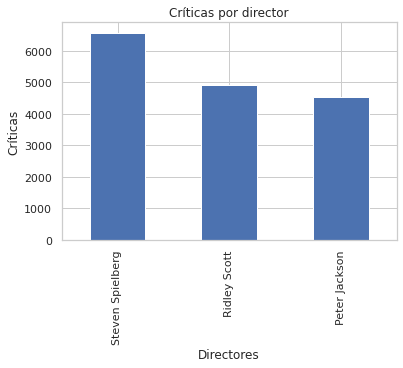

In [0]:
# directores con cantidad de críticas
# Se agrupa por director y se suma por número de críticas
dire_criticas = dt.groupby(['director_name'])['num_critic_for_reviews'].sum()
# Se ordenan los valores de acuerdo al número de críticas y se ordenan de mayor a menor 
# Sólo se muestran los primeros 3 directores con más críticas en total
dc = dire_criticas.sort_values(ascending=False).head(3).plot(kind = 'bar', title = "Críticas por director")
#director_name
#Steven Spielberg    6582.0
#Ridley Scott        4930.0
#Peter Jackson       4542.0
dc.set_ylabel("Críticas")
dc.set_xlabel("Directores")

#El director más criticado es Steven Spielberg con un total de 6582 críticas en total

##TOP 10 de películas con mayor duración

Usando ```decribe()``` en ```dt['duration'].describe()``` se obtiene que la mayor duración que existe en el registro es de 511, por los mismo se debe de obtener el mismo resultado al ordenar.

Se usa ```loc``` que :

>El método loc permite seleccionar filas o columnas en base a una etiqueta o seleccionar filas o columnas en base a una condición. ([Fuente](https://www.analyticslane.com/2019/06/21/seleccionar-filas-y-columnas-en-pandas-con-iloc-y-loc/))

Se ordenan los valores de las columnas ```movie_title``` y de ```duration``` por la duración, de forma descendente:

```python
dt.loc[:,['movie_title', 'duration']].sort_values(by='duration', ascending=False)
# by = se indica el valor, por el que se quiere ordenar
# ascending = Se le indica con un valor boolean si es que se quiere de manera ascendente o no
```

Por último se muestra los primeros 10 registros de las películas que tienen mayor duración con ```head()```

In [0]:
#mirando los datos de la columna duration
#dt['duration'].describe() # max = 511 // dato máximo#

#obtener top 10
duracion_pelis = dt.loc[:,['movie_title', 'duration']].sort_values(by='duration', ascending=False)
duracion_pelis.head(10)

#Película con más duración es Trapped, con una duración de 511 minutos
#Top 10 de peliculas con más duración

,movie_title,duration
1710,Trapped,511.0
2466,Carlos,334.0
1501,"Blood In, Blood Out",330.0
1144,Heaven's Gate,325.0
3311,The Legend of Suriyothai,300.0
2970,Das Boot,293.0
1571,Apocalypse Now,289.0
2727,The Company,286.0
883,Gods and Generals,280.0
1980,Gettysburg,271.0


##Género con más relevancia

Se tomán todos los valores que se encuentran en la columna ```genres```, se cuentan todos lo valores con la función ```value_counts()```

Por último se muestran los primeros 5 géneros que más se repiten, quedando como el género más relevante **Drama**


In [0]:
#dt['genres'].describe() # top Drama
genero_relevante = dt['genres'].value_counts()
genero_relevante.head(5)

#Género con mayor relevancia Drama, con un total de 236#

Drama                   236
Comedy                  209
Comedy|Drama            191
Comedy|Drama|Romance    187
Comedy|Romance          158
Name: genres, dtype: int64

#Análisis Libre

##Top 10 actores principales que están en más películas

Se toman todos los actores que más se repiten, quedando como el actor más relevante (```actor_1_name```) **Robert De Niro**


In [0]:
actores_principales = dt['actor_1_name'].value_counts().sort_values(ascending = False)
actores_principales.head(10)



Robert De Niro       49
Johnny Depp          41
Nicolas Cage         33
J.K. Simmons         31
Bruce Willis         30
Matt Damon           30
Denzel Washington    30
Liam Neeson          29
Harrison Ford        27
Robin Williams       27
Name: actor_1_name, dtype: int64

##Porcentaje de los lenguajes originales de las películas

Ver el porcentaje que ocupa cada idioma de acuerdo al total de películas

In [0]:
len_ori = dt['language'].value_counts().head(10)
#len_ori.describe() Predomina el inglés, y existen 47 lenguajes diferentes en los registros
len_ori.index[0] #muestra los idiomas#
len_ori[0] #muestra las cantidades#
len(len_ori) 

10

In [0]:
def porcentaje_idioma(cantidad, idioma):
    total = dt['movie_title'].count()
    porcentaje = (cantidad * 100) / total
    return "Existen un total de {} películas en el idioma {}, que corresponde al {}% de un total de {} películas".format(cantidad, idioma, str(porcentaje)[0:4], total)
    #str(porcentaje)[0:4] Para truncar el porcentaje
for i in range(len(len_ori+1)): #Se recorre len_ori#
  print(porcentaje_idioma( len_ori[i], len_ori.index[i])) # Se sacan los parámetros y se envían a la función#



Existen un total de 4704 películas en el idioma English, que corresponde al 93.2% de un total de 5043 películas
Existen un total de 73 películas en el idioma French, que corresponde al 1.44% de un total de 5043 películas
Existen un total de 40 películas en el idioma Spanish, que corresponde al 0.79% de un total de 5043 películas
Existen un total de 28 películas en el idioma Hindi, que corresponde al 0.55% de un total de 5043 películas
Existen un total de 26 películas en el idioma Mandarin, que corresponde al 0.51% de un total de 5043 películas
Existen un total de 19 películas en el idioma German, que corresponde al 0.37% de un total de 5043 películas
Existen un total de 18 películas en el idioma Japanese, que corresponde al 0.35% de un total de 5043 películas
Existen un total de 11 películas en el idioma Italian, que corresponde al 0.21% de un total de 5043 películas
Existen un total de 11 películas en el idioma Cantonese, que corresponde al 0.21% de un total de 5043 películas
Existen 

English      0.93278
French       0.01448
Spanish      0.00793
Hindi        0.00555
Mandarin     0.00516
German       0.00377
Japanese     0.00357
Italian      0.00218
Cantonese    0.00218
Russian      0.00218
Name: language, dtype: float64


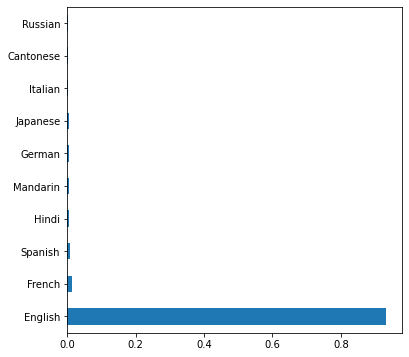

In [0]:
""" ¿y si hacemos esto? """
""" Como aún no vemos lamba y programación funcional, lo haremos de la siguiente manera """
""" Provicionaremos la data de language en una nueva variable"""
new_data = dt['language']
""" Obtenemos la cantidad de elementos que hay en cada uno y lo dividiremos por el largo total de la data"""
count_data = new_data.value_counts()
len_data = len(new_data)
print((count_data/len_data)[:10]) # imprimimos la info
(count_data/len_data)[:10].plot(
    kind="barh",
    figsize=(6,6)
) # hacemos un bonito, aun no vemos mas tipos de graficos, pero existe una libreria llamada matplotlib.pyplot para agregar mas configuraciones :o 
#top_10_lenguage = dt['language'].value_counts()[:10] # optenemos el top 10, muy bien, trabajamos como vector


Hay un total de 2698 valores nulos y existen un total de 138506 valores validos de un total de 141204 datos


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,7.60506e+08,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,2.37000e+08,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,3.09404e+08,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,3.00000e+08,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,2.00074e+08,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,2.45000e+08,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,4.48131e+08,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,2.50000e+08,2012.0,23000.0,8.5,2.35,164000
4,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,0.00000e+00,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,0,0.0,0,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,0.0,0,0,0,0.00000e+00,0.0,12.0,7.1,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,0.00000e+00,Comedy|Drama,Eric Mabius,Signed Sealed Delivered,629,2283,Crystal Lowe,2.0,fraud|postal worker|prison|theft|trial,http://www.imdb.com/title/tt3000844/?ref_=fn_t...,6.0,English,Canada,0,0.00000e+00,2013.0,470.0,7.7,0.00,84
5039,Color,0,43.0,43.0,0.0,319.0,Valorie Curry,841.0,0.00000e+00,Crime|Drama|Mystery|Thriller,Natalie Zea,The Following,73839,1753,Sam Underwood,1.0,cult|fbi|hideout|prison escape|serial killer,http://www.imdb.com/title/tt2071645/?ref_=fn_t...,359.0,English,USA,TV-14,0.00000e+00,0.0,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,0.00000e+00,Drama|Horror|Thriller,Eva Boehnke,A Plague So Pleasant,38,0,David Chandler,0.0,0,http://www.imdb.com/title/tt2107644/?ref_=fn_t...,3.0,English,USA,0,1.40000e+03,2013.0,0.0,6.3,0.00,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,1.04430e+04,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,1255,2386,Eliza Coupe,5.0,0,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,9.0,English,USA,PG-13,0.00000e+00,2012.0,719.0,6.3,2.35,660


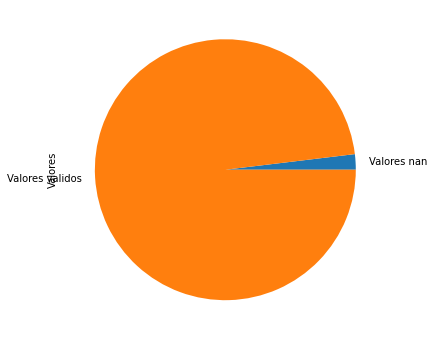

In [0]:
"""" ¿Pero que pasa con la data nula ?"""
""" En pandas tenemos dos tipos de datos invalidos, NaN o Null, en este caso buscaremos los NaN.
En el caso de este CSV se repite mucho lo que es NaN.
"""
dt[dt.isna()] # imprimimos los NaN y verlos... son bastantes no?
dt.isna().sum() # imprimimos la suma de los valores nana por columnas y ufff
total_nan = dt.isna().sum().sum() # sumamos todas las columnas para obtener un solo valor 2698 :o
""" ¿Que pasa con los valores trabajables?"""
dt.count() # el hacer un count, solo contara los valores "Validos" para trabajar
total_valido = dt.count().sum() # obtenemos la suma de todos los valores trabajables 138506
print("Hay un total de {} valores nulos y existen un total de {} valores validos de un total de {} datos".format(total_nan,total_valido,dt.size))
""" Creamos una pequeña Serie para crear un grafico"""
serie_vacios = pd.Series(
    name="Valores",
    data=[total_nan,total_valido],
    index=["Valores nan","Valores validos"])
serie_vacios.plot.pie(
    figsize=(6,6),
)
""" Ahora conociendo está información, como cambiaria todo lo que tiene si remueve o remplaza los valores nan"""
dt.dropna() # borrar datos nan
dt.fillna(value=0) # remplazar valores nan
""" aquí queda su criterio :o"""